### Goal for this case study is to analyze Vinho Verde wine quality (A Wine from Portugal) based on Physio Chemical tests.



### Questions
Assume that If you are owner of Wineyard then how will this dataset help..  <br> Let's frame some questions for analysis.
* What chemical characteristics are most important in predicting the quality of wine?
* Is a certain type of wine (Red or White) associated with higher quality?
* Do wines with higher alcoholic content receive better ratings?
* Do sweeter wines (more residual sugar) receive better ratings?
* What level of acidity is associated with the highest quality?

### Data Gathering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
red_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
red_df = pd.read_csv(red_url, sep = ';')

red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
white_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
white_df = pd.read_csv(white_url, sep = ';')
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Preliminary Assessment of Data

In [4]:
# How many samples of Red wine?
red_df.shape

(1599, 12)

In [5]:
# How many samples of White wine?
white_df.shape

(4898, 12)

In [6]:
# Which features have missing values in red wine data?
red_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# Which features have missing values in white wine data?
white_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# How many duplicate rows are in red wine?
red_df.duplicated().sum()

240

In [9]:
# How many duplicate rows are in white wine?
white_df.duplicated().sum()

937

In [10]:
# How many unique values are in red wine data?
red_df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [11]:
# How many unique values are in white wine data?
white_df.nunique()

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

### Appending Red and White Wine data
This will help in effective analysis

In [12]:
red = np.repeat('red',red_df.shape[0])
white = np.repeat('white', white_df.shape[0])

In [13]:
red_df['color'] = red
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [14]:
white_df['color'] = white
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


### Quality check before appending both the datasets
1) check column names

### Appending both dataset to create new dataframe

In [15]:
Wine = red_df.append(white_df)
Wine.columns = Wine.columns.str.replace(' ','_')

Wine.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [16]:
Wine.shape

(6497, 13)

### Exploring new dataset

#### Question: Find Skewness using histogram

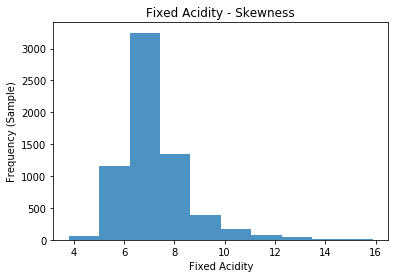

In [17]:
Wine['fixed_acidity'].plot(kind = 'hist', alpha = 0.8)
plt.title('Fixed Acidity - Skewness')
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency (Sample)');

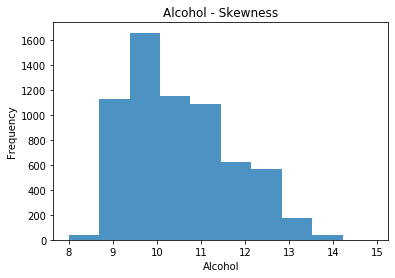

In [18]:
Wine['alcohol'].plot(kind = 'hist', alpha = 0.8)
plt.title('Alcohol - Skewness')
plt.xlabel('Alcohol');

#### Question: Which features that have positive impact on Quality

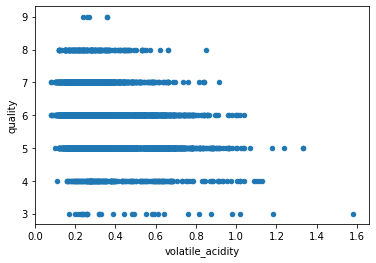

In [19]:
Wine.plot.scatter(x='volatile_acidity', y= 'quality'); #Negative

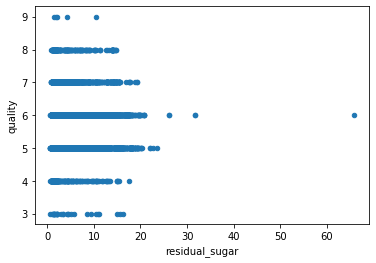

In [20]:
Wine.plot.scatter(x='residual_sugar', y= 'quality') 

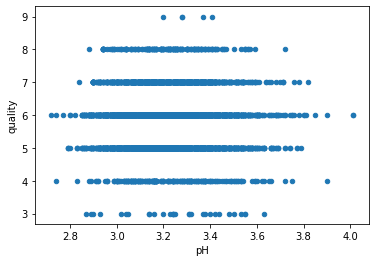

In [21]:
Wine.plot.scatter(x='pH', y= 'quality')

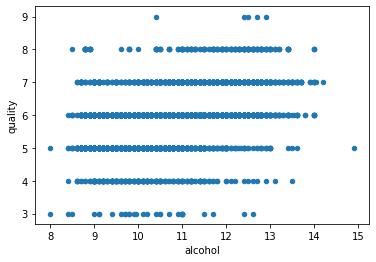

In [22]:
Wine.plot.scatter(x='alcohol', y= 'quality') #Positive

#### <u>Findings</u>: Alcohol has high impact on Quality. In above scatterplot, as Quality increases, alcohol content increases 

In [23]:
Wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


#### Question: Find mean pH for all quality

In [24]:
Wine.groupby(['quality','color'], as_index=False)['pH'].mean()

,quality,color,pH
0,3,red,3.398000
1,3,white,3.187500
2,4,red,3.381509
3,4,white,3.182883
4,5,red,3.304949
5,5,white,3.168833
6,6,red,3.318072
7,6,white,3.188599
8,7,red,3.290754
9,7,white,3.213898


#### Question: Is a certain type of wine associated with high quality?

In [25]:
Wine.groupby('color')['quality'].mean()

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

#### <u>Findings</u> : Average Quality of White wine is greater than Red wine

#### Question: What level of acidity (pH) receives highest average ratings?

In [26]:
Wine.groupby('pH')['quality'].mean()

pH
2.72    6.000000
2.74    5.000000
2.77    6.000000
2.79    5.000000
2.80    5.666667
          ...   
3.81    6.000000
3.82    7.000000
3.85    6.000000
3.90    5.000000
4.01    6.000000
Name: quality, Length: 108, dtype: float64

#### Troubleshooting needed as pH is a quantative variable without clear categories. Creating categories

In [27]:
# View the min, 25%, 50%, 75%, max pH values with Pandas describe
Wine['pH'].describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [28]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [ 2.720000,3.110000 ,3.210000 ,3.320000 ,4.010000 ] 

In [29]:
# Labels for the four acidity level groups
bin_names = ['High','Moderate High' ,'Medium' ,'Low']

In [30]:
# Creates acidity level column
Wine['acidity_level'] = pd.cut(Wine['pH'], bin_edges , labels= bin_names)
Wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_level
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,Moderate High
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,Moderate High
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low


In [31]:
Wine.groupby('acidity_level', as_index=False)['quality'].mean()

,acidity_level,quality
0,High,5.783343
1,Moderate High,5.784540
2,Medium,5.850832
3,Low,5.859593


#### <u>Findings</u>: Low level of acidity receives highest average quality rating

#### Question: Do wines with higher alcoholic content receive better ratings?

In [32]:
Wine.alcohol.median()

10.3

In [33]:
#select sample with alcohol content less than median
low_alcohol = Wine.query('alcohol < 10.3') 

#select sample with alcohol content greater than median
high_alcohol = Wine.query('alcohol >= 10.3')

#verify if we have only 1 sample
num_sample = Wine.shape[0]
num_sample == low_alcohol['quality'].count()+high_alcohol['quality'].count()

True

In [34]:
# Mean quality for low and high
low_alcohol = low_alcohol.quality.mean()
high_alcohol =high_alcohol.quality.mean()
low_alcohol,high_alcohol

(5.475920679886686, 6.146084337349397)

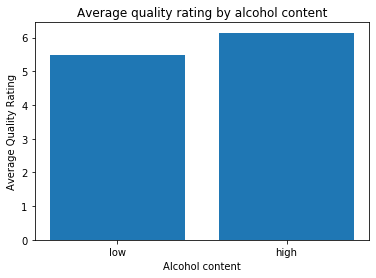

In [35]:
locations = [1,2]
x = [low_alcohol,high_alcohol]
label = ['low','high']
plt.bar(locations,x, tick_label = label)
plt.xlabel('Alcohol content')
plt.ylabel('Average Quality Rating')
plt.title('Average quality rating by alcohol content');

#### <u>Findings</u>: Wines with higher alcohol receive high average ratings

#### Questions: Do sweeter wines generally receive higher ratings?

In [36]:
Wine['residual_sugar'].median()

3.0

In [37]:
low = Wine.query('residual_sugar < 3.0')
high = Wine.query('residual_sugar >= 3.0')

num_samples = Wine.shape[0]
num_samples == low.residual_sugar.count()+high.residual_sugar.count() # samples are exactly ones

True

In [38]:
low_s = low.quality.mean()
high_s = high.quality.mean()
low_s,high_s

(5.808800743724822, 5.82782874617737)

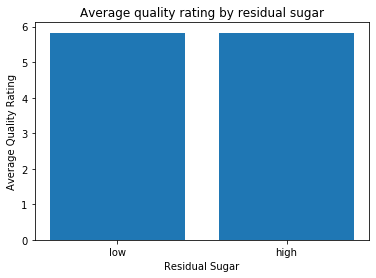

In [39]:
locations = [1,2]
x = [low_s,high_s]
label = ['low','high']
plt.bar(locations,x, tick_label = label)
plt.xlabel('Residual Sugar')
plt.ylabel('Average Quality Rating')
plt.title('Average quality rating by residual sugar');

#### <u>Findings</u>: Sweeter wines receive higher ratings

#### Question: What level of acidity receives highest average rating?

In [40]:
x = Wine.groupby('acidity_level')['quality'].mean()
x

acidity_level
High             5.783343
Moderate High    5.784540
Medium           5.850832
Low              5.859593
Name: quality, dtype: float64

Text(0, 0.5, 'Quality')

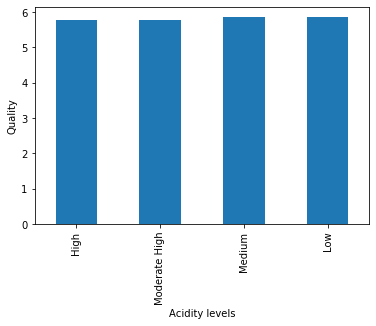

In [41]:
x.plot(kind = 'bar')
plt.xlabel('Acidity levels')
plt.ylabel('Quality')

#### <u>Findings</u>: Wines with low acidity levels receive higher average quality